<img src="https://devra.ai/analyst/notebook/1642/image.jpg" style="width: 100%; height: auto;" />


<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
    <div style="font-size:150%; color:#FEE100"><b>Human Cognitive Performance Analysis</b></div>
    <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>


# Table of Contents

1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Prediction Modeling](#Prediction-Modeling)
6. [Conclusions](#Conclusions)


In [9]:
# Importing libraries and setting up the environment
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Import and configure matplotlib
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is imported in some environments

# For inline plotting on Kaggle
%matplotlib inline

import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Setting a seaborn style
sns.set(style="whitegrid")

print('Imports complete; let the analysis begin')

Imports complete; let the analysis begin


# Introduction

Cognitive performance is arguably one of the most fascinating and multifaceted aspects of human behavior. It is intriguing to see how various lifestyle choices, like sleep duration, daily screen time, and even diet, may interact to affect our mental agility. In this notebook we shall dive deep into understanding these relationships using the Kaggle Human Cognitive Performance dataset. If you find the insights presented here useful, please consider upvoting this notebook.


# Data Loading

Here we load the data from the provided CSV file. The data includes measures of various factors such as Age, Sleep Duration, Stress_Level, and even AI_Predicted_Score. Note that while the dataset does not contain date columns, it provides enough interesting numeric and categorical variables for a robust analysis.


In [10]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("samxsam/human-cognitive-performance-analysis")

csv_path = os.path.join(path, "human_cognitive_performance.csv")
df = pd.read_csv(csv_path)

print("Shape:", df.shape)
df.head()

Shape: (80000, 13)


,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


# Data Cleaning and Preprocessing

It is always imperative to verify if the dataset needs any cleaning. Here we inspect for missing values, check data types, and ensure that our numeric columns are in a proper format. Given the structured nature of this dataset, we expect minimal issues; however, if you run into any unexpected errors, please note that verifying data types and handling missing values are key steps to resolving those issues.


In [11]:
# Check for missing values and data types
print('Data types:')
print(df.dtypes)

print('\nMissing value counts:')
print(df.isnull().sum())

# If needed, fill or drop missing values (here we simply drop rows if any are missing)
df.dropna(inplace=True)

# Convert any numeric columns in case they are misinterpreted
numeric_columns = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 
                   'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score', 'Cognitive_Score', 'AI_Predicted_Score']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print('\nData cleaned successfully. Here are the first few rows after preprocessing:')
df.head()

Data types:
User_ID                object
Age                     int64
Gender                 object
Sleep_Duration        float64
Stress_Level            int64
Diet_Type              object
Daily_Screen_Time     float64
Exercise_Frequency     object
Caffeine_Intake         int64
Reaction_Time         float64
Memory_Test_Score       int64
Cognitive_Score       float64
AI_Predicted_Score    float64
dtype: object

Missing value counts:
User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64

Data cleaned successfully. Here are the first few rows after preprocessing:


,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


# Exploratory Data Analysis

In this section we explore the dataset using a variety of visualization techniques. We aim to reveal patterns, possible correlations, and any outliers in the data. Our visualizations include histograms, box plots, a correlation heatmap for numeric variables, as well as pair plots to check for potential relationships between variables.


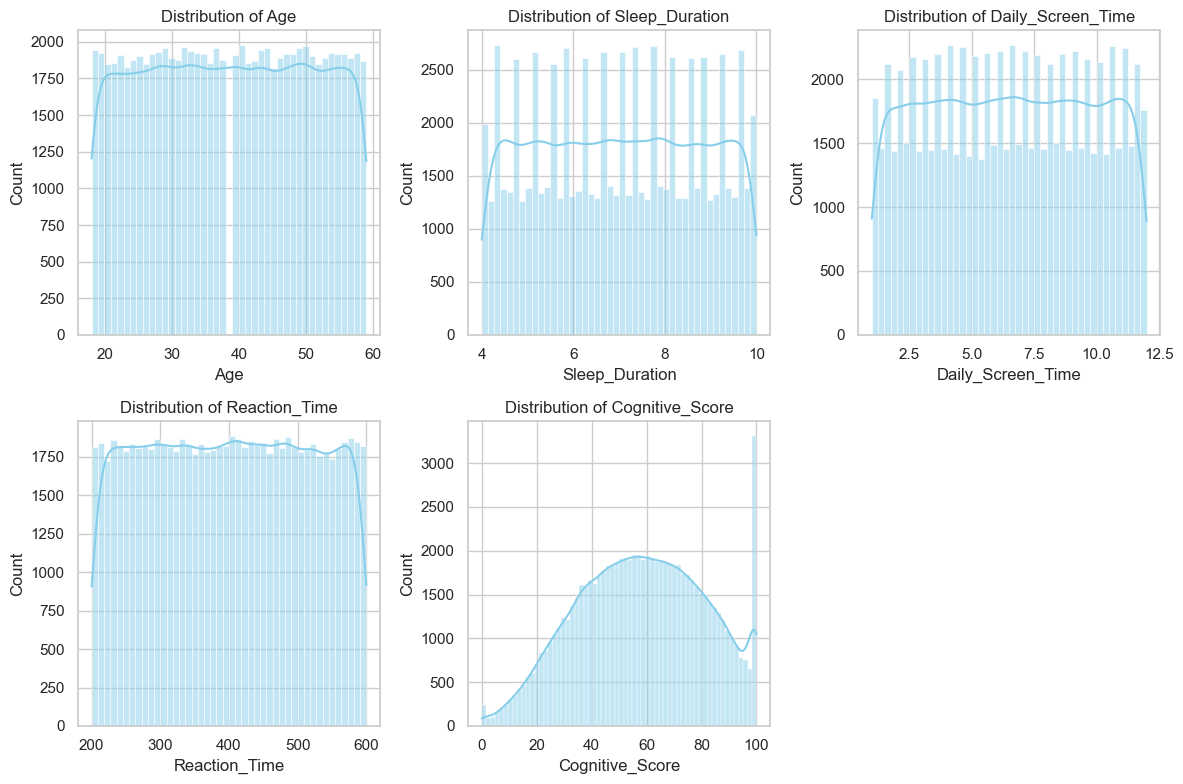

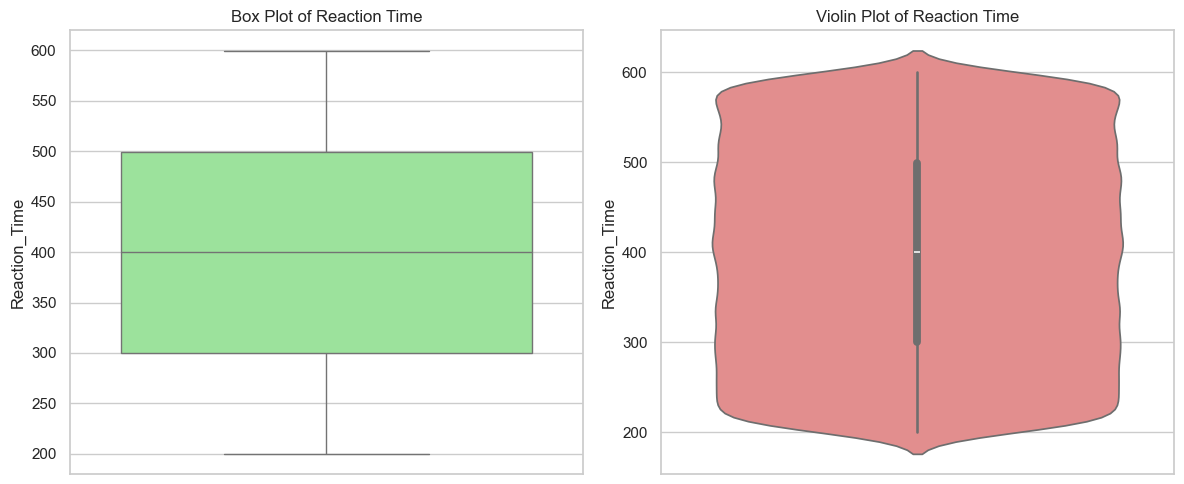

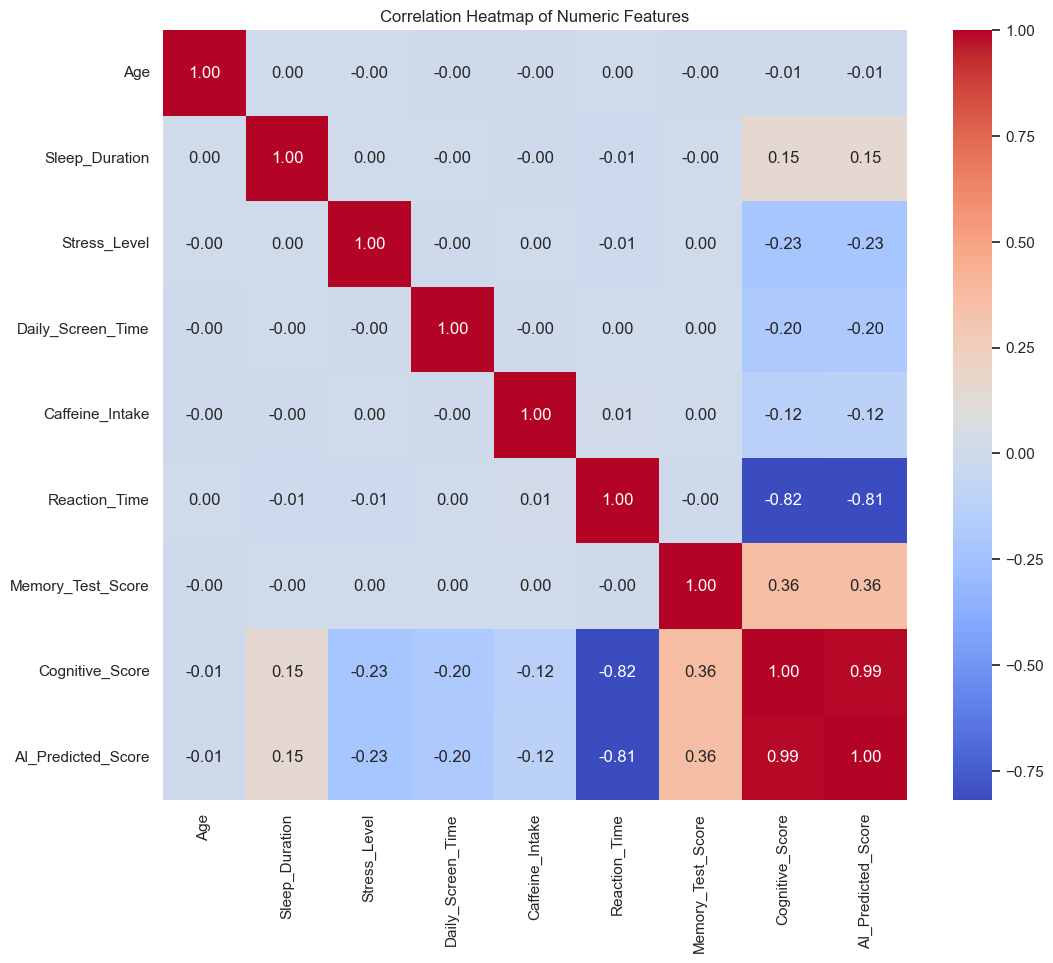

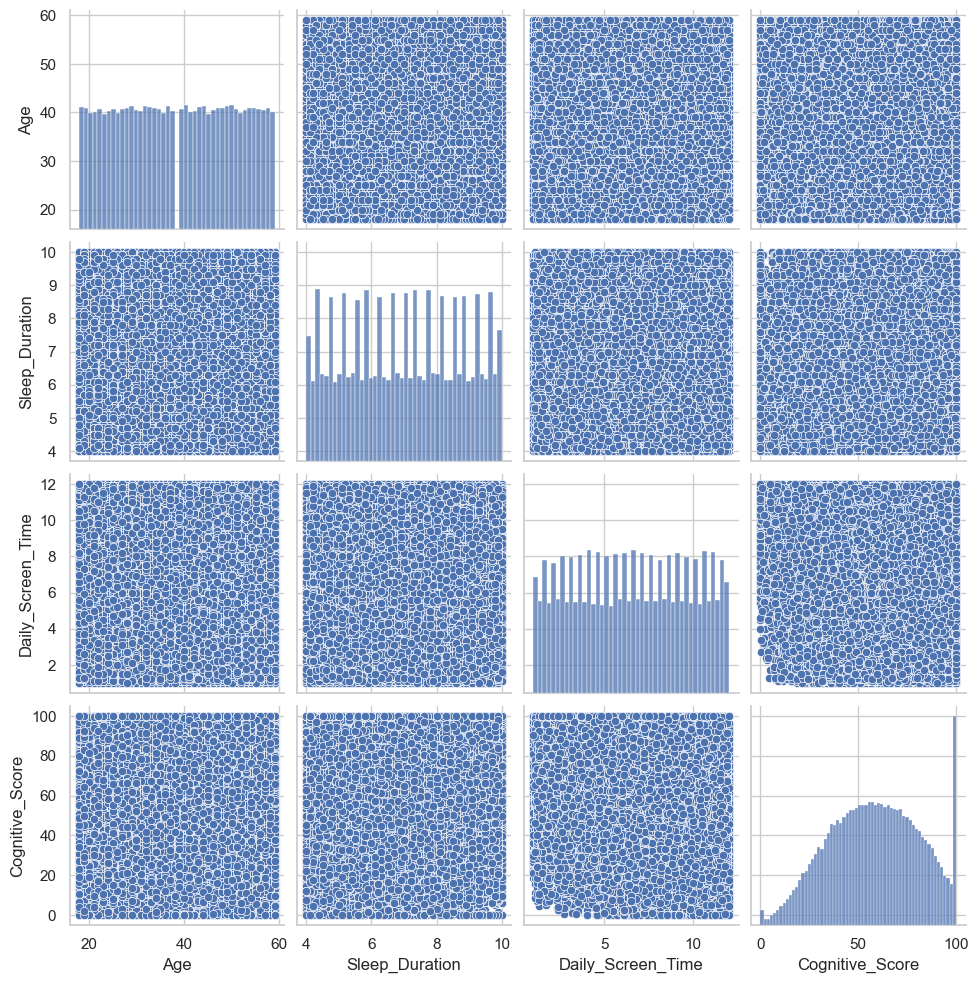

In [12]:
# Selecting numeric dataframe for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Histogram for a few numeric columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Sleep_Duration', 'Daily_Screen_Time', 'Reaction_Time', 'Cognitive_Score'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(numeric_df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Box Plot and Violin Plot for Reaction_Time
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=numeric_df['Reaction_Time'], color='lightgreen')
plt.title('Box Plot of Reaction Time')

plt.subplot(1, 2, 2)
sns.violinplot(y=numeric_df['Reaction_Time'], color='lightcoral')
plt.title('Violin Plot of Reaction Time')

plt.tight_layout()
plt.show()

# Correlation Heatmap if sufficient numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

# Pair Plot
sns.pairplot(numeric_df[['Age', 'Sleep_Duration', 'Daily_Screen_Time', 'Cognitive_Score']])
plt.show()

# Prediction Modeling

One question that arises from this dataset is whether we can predict a person's cognitive performance based on the other available variables. In this section we build a simple predictor using Linear Regression to predict the Cognitive_Score. We use only numeric features for training. Note that, in a more advanced analysis, one might choose to encode categorical variables and build a more complex model. Here, simplicity is our ally. We also display the model's performance using the R² metric.


Linear Regression model R² score: 0.9316758787013275


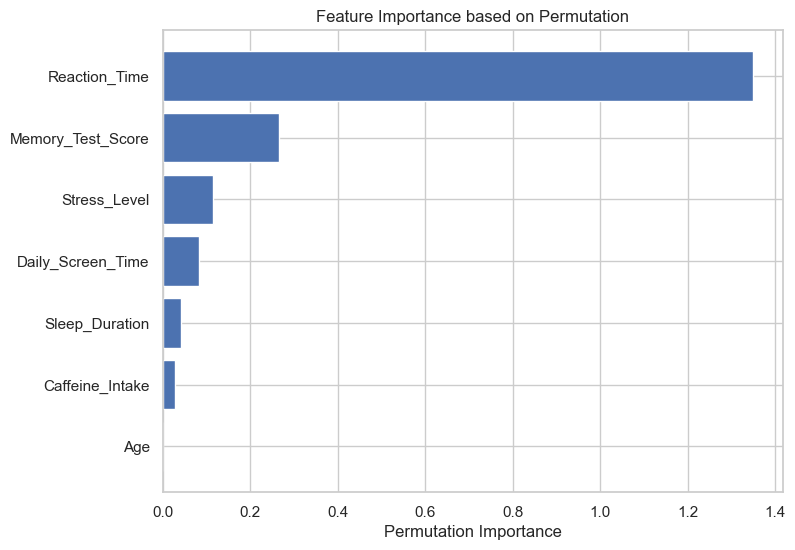

In [13]:
# Prepare data for prediction
# We'll predict Cognitive_Score based on a subset of numeric features.
feature_columns = ['Age', 'Sleep_Duration', 'Stress_Level', 'Daily_Screen_Time', 'Caffeine_Intake', 'Reaction_Time', 'Memory_Test_Score']
target_column = 'Cognitive_Score'

X = df[feature_columns]
y = df[target_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print('Linear Regression model R² score:', score)

# Permutation Importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(np.array(feature_columns)[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance based on Permutation')
plt.show()

# Conclusions

In this notebook we thoroughly explored the Human Cognitive Performance dataset. We demonstrated various visualization techniques including histograms, box and violin plots, correlation heatmaps, as well as pair plots to uncover relationships in the data. Furthermore, we built a simple Linear Regression model to predict Cognitive_Score from several lifestyle and psychological factors, and we evaluated the model with a permutation importance analysis to identify influential features.

The approaches covered here reflect a balance between exploratory analysis and predictive modeling, emphasizing the importance of robust data cleaning and visualization practices. Future work could involve incorporating categorical variables through encoding, trying more sophisticated machine learning models, or even time-series analysis if temporal data becomes available. Your feedback and upvotes are welcome if you found these insights valuable.
